In [1]:
import graph_propagation as gp
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
inputs = (
    ('comunity_circle_h1', ['p19', 'p3', 'p55']        , 3),
    ('small_world_1'     , ['p33', 'p83']              , 3),
    ('free_scale_1'      , ['p44', 'p85', 'p64', 'p82'], 3),
)

In [3]:
def print_table(file_name, nodes_to, max_k):
    adjs, nodes = gp.load_adj_from_file(file_name)
    nodes_data  = []
    for n in nodes_to:
        nodes_data.append([gp.node_popularity(gp.propagation(adjs, k + 1), nodes, n) for k in range(max_k)])
    
    print(r"\begin{table}[l|" + ("c" * max_k) + "]")
    print("\t" + r"\textbf{k} & " + " & ".join(str(i) for i in range(1, max_k + 1)) + r" \\ \hline")
    for i, n in enumerate(nodes_to):
        print("\t" + " & ".join(str(j).upper() for j in [n] + nodes_data[i]) + r" \\ \hline")
    print(r"\end{table}")

In [4]:
def plot_results(file_name, nodes_to, max_k):
    adjs, nodes = gp.load_adj_from_file(file_name)
    fig, plots = plt.subplots(1, max_k)
    
    fig.suptitle(" ".join(w.capitalize() for w in file_name.split("_")))
    fig.set_figwidth(18.5)
    
    plots[0].set(ylabel="Popularidad por Nodo")
    for k in range(max_k):
        kk = k + 1
        B  = gp.propagation(adjs, kk)
        
        plot = plots[k]
        plot.set_title(f"k = { kk }")
        plot.boxplot([gp.node_popularity(B, nodes, n) for n in nodes])
    
    plt.show()

\begin{table}[l|ccc]
	\textbf{k} & 1 & 2 & 3 \\ \hline
	P19 & 3 & 8 & 21 \\ \hline
	P3 & 5 & 15 & 24 \\ \hline
	P55 & 2 & 5 & 12 \\ \hline
\end{table}




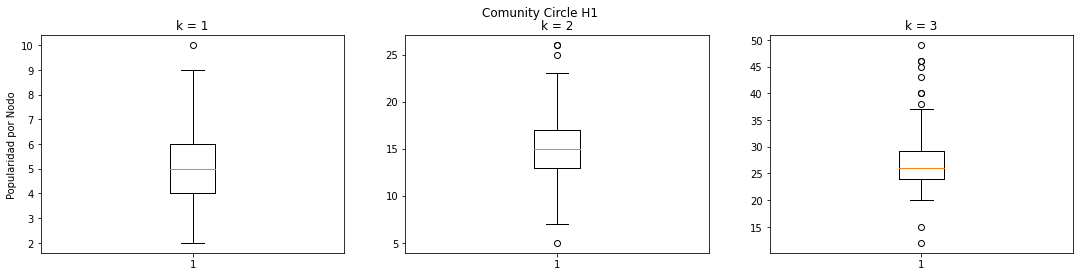





\begin{table}[l|ccc]
	\textbf{k} & 1 & 2 & 3 \\ \hline
	P33 & 4 & 15 & 41 \\ \hline
	P83 & 4 & 12 & 36 \\ \hline
\end{table}




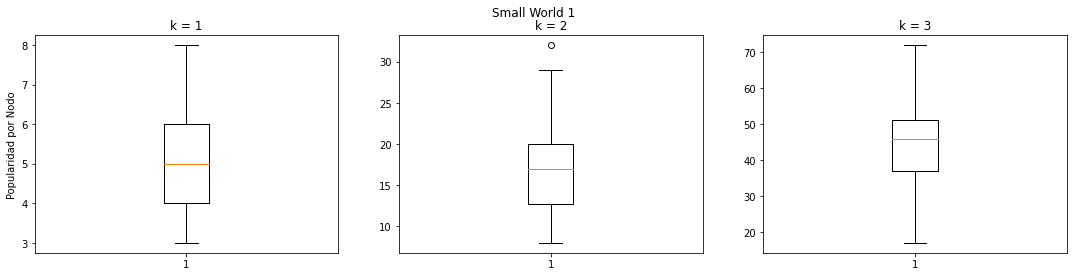





\begin{table}[l|ccc]
	\textbf{k} & 1 & 2 & 3 \\ \hline
	P44 & 2 & 4 & 6 \\ \hline
	P85 & 2 & 4 & 6 \\ \hline
	P64 & 2 & 3 & 4 \\ \hline
	P82 & 2 & 3 & 4 \\ \hline
\end{table}




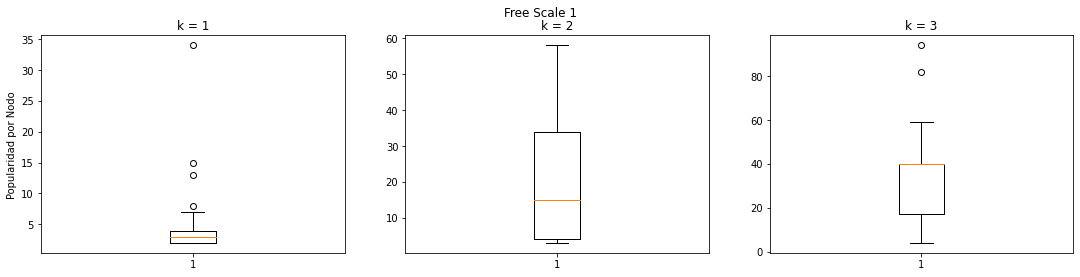

In [5]:
for f_name, nodes, k in inputs:
    print_table(f_name, nodes, k)
    print("\n")
    plot_results(f_name, nodes, k)
    print("\n\n\n")